In [4]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler, Normalizer, LabelEncoder, OneHotEncoder
import numpy as np


In [5]:
# Đọc dữ liệu
duLieu = pd.read_csv('Wine.csv')
print("5 dòng đầu:")
print(duLieu.head())


5 dòng đầu:
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0           11.6             0.580         0.66            2.20      0.074   
1           10.4             0.610         0.49            2.10      0.200   
2            7.4             1.185         0.00            4.25      0.097   
3           10.4             0.440         0.42            1.50      0.145   
4            8.3             1.020         0.02            3.40      0.084   

   free sulfur dioxide  total sulfur dioxide  density    pH  sulphates  \
0                   10                    47  1.00080  3.25       0.57   
1                    5                    16  0.99940  3.16       0.63   
2                    5                    14  0.99660  3.63       0.54   
3                   34                    48  0.99832  3.38       0.86   
4                    6                    11  0.99892  3.48       0.49   

   alcohol   class  
0      9.0  Loai 2  
1      8.4  Loai 2  
2     10.7 

In [6]:
# -------------------------------
# Tách phần đặc trưng và nhãn
# -------------------------------
X = duLieu.drop('class', axis=1)
y = duLieu['class']
'''
→ Chia dữ liệu:

X: chỉ gồm các thuộc tính đầu vào (feature), loại bỏ cột class.

y: chứa nhãn phân loại (class) để dùng cho bước số hóa.
'''

'\n→ Chia dữ liệu:\n\nX: chỉ gồm các thuộc tính đầu vào (feature), loại bỏ cột class.\n\ny: chứa nhãn phân loại (class) để dùng cho bước số hóa.\n'

In [7]:
# ===============================
# 4.1. Điều chỉnh tỉ lệ (Rescale Data)
# ===============================
scaler_minmax = MinMaxScaler(feature_range=(0, 1))
X_rescaled = scaler_minmax.fit_transform(X)
df_rescaled = pd.DataFrame(X_rescaled, columns=X.columns)
print("\n[4.1] Sau khi Rescale (MinMax):")
print(df_rescaled.describe().T[['min', 'max']])



[4.1] Sau khi Rescale (MinMax):
                      min  max
fixed acidity         0.0  1.0
volatile acidity      0.0  1.0
citric acid           0.0  1.0
residual sugar        0.0  1.0
chlorides             0.0  1.0
free sulfur dioxide   0.0  1.0
total sulfur dioxide  0.0  1.0
density               0.0  1.0
pH                    0.0  1.0
sulphates             0.0  1.0
alcohol               0.0  1.0


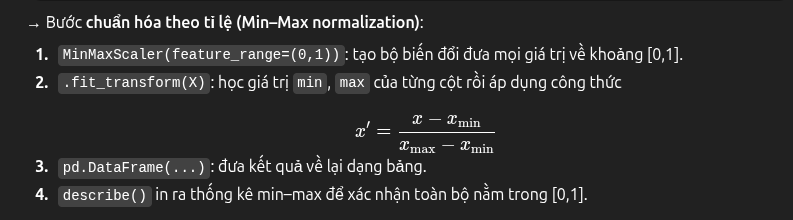

In [8]:
# ===============================
# 4.2. Chuẩn hóa dữ liệu (Standardize Data)
# ===============================
scaler_std = StandardScaler()
X_standardized = scaler_std.fit_transform(X)
df_standardized = pd.DataFrame(X_standardized, columns=X.columns)
print("\n[4.2] Sau khi Standardize (Z-score):")
print(df_standardized.describe().T[['mean', 'std']])



[4.2] Sau khi Standardize (Z-score):
                              mean       std
fixed acidity         3.554936e-16  1.000313
volatile acidity      1.599721e-16  1.000313
citric acid          -7.109871e-17  1.000313
residual sugar       -1.222009e-16  1.000313
chlorides             3.643809e-16  1.000313
free sulfur dioxide   6.665504e-17  1.000313
total sulfur dioxide -1.777468e-17  1.000313
density               2.412024e-14  1.000313
pH                   -3.110569e-17  1.000313
sulphates            -6.398884e-16  1.000313
alcohol               1.066481e-16  1.000313


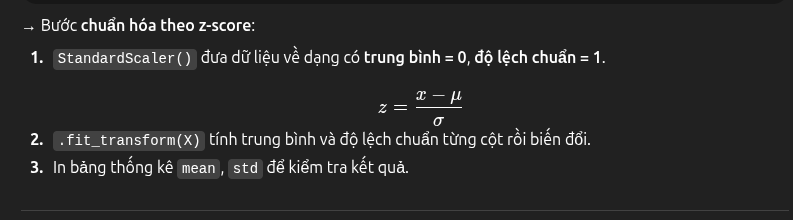

In [9]:
# ===============================
# 4.3. Bình thường hóa dữ liệu (Normalize Data)
# ===============================
normalizer = Normalizer(norm='l2')
X_normalized = normalizer.fit_transform(X)
df_normalized = pd.DataFrame(X_normalized, columns=X.columns)
print("\n[4.3] Sau khi Normalize (L2=1 cho mỗi hàng):")
print(df_normalized.iloc[:5, :5])  # in 5 cột đầu 5 dòng đầu



[4.3] Sau khi Normalize (L2=1 cho mỗi hàng):
   fixed acidity  volatile acidity  citric acid  residual sugar  chlorides
0       0.230072          0.011504     0.013090        0.043634   0.001468
1       0.476601          0.027955     0.022455        0.096237   0.009165
2       0.359296          0.057536     0.000000        0.206353   0.004710
3       0.171393          0.007251     0.006922        0.024720   0.002390
4       0.429846          0.052824     0.001036        0.176082   0.004350


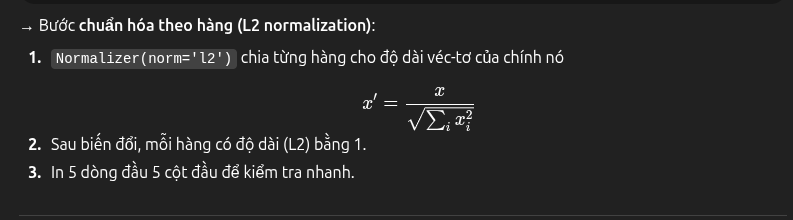

In [10]:
# ===============================
# 4.4. Số hóa dữ liệu (Digitalization)
# ===============================
# a) Label Encoding
le = LabelEncoder()
y_label = le.fit_transform(y)
print("\n[4.4.a] Label Encoding:")
print("Class gốc → số:", dict(zip(le.classes_, le.transform(le.classes_))))
print("10 giá trị đầu:", y_label[:10])



[4.4.a] Label Encoding:
Class gốc → số: {'Loai 1': np.int64(0), 'Loai 2': np.int64(1), 'Loai 3': np.int64(2), 'Loai 4': np.int64(3), 'Loai 5': np.int64(4)}
10 giá trị đầu: [1 1 1 2 1 1 1 3 3 1]


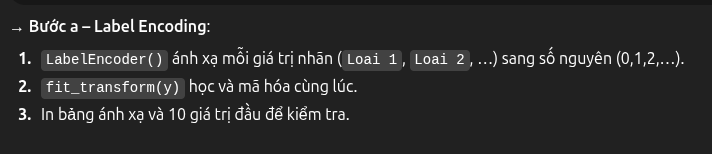

In [11]:
# b) One-Hot Encoding
ohe = OneHotEncoder(sparse_output=False)
y_onehot = ohe.fit_transform(y_label.reshape(-1, 1))
print("\n[4.4.b] One-Hot Encoding:")
print("Kích thước ma trận:", y_onehot.shape)
print("5 hàng đầu:\n", y_onehot[:5])



[4.4.b] One-Hot Encoding:
Kích thước ma trận: (1599, 5)
5 hàng đầu:
 [[0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0.]]


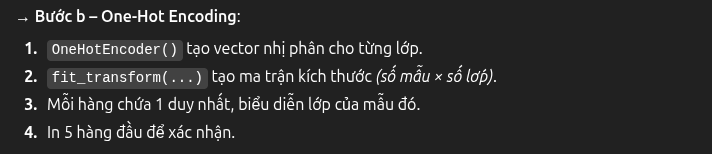

In [12]:
# ===============================
# Tóm tắt
# ===============================
print("\nTÓM TẮT:")
print("- 4.1: Rescale → dữ liệu nằm trong [0,1]")
print("- 4.2: Standardize → mean≈0, std≈1")
print("- 4.3: Normalize → mỗi hàng có độ dài = 1")
print("- 4.4: Digitalization → chuyển Class sang số (Label/OneHot)")



TÓM TẮT:
- 4.1: Rescale → dữ liệu nằm trong [0,1]
- 4.2: Standardize → mean≈0, std≈1
- 4.3: Normalize → mỗi hàng có độ dài = 1
- 4.4: Digitalization → chuyển Class sang số (Label/OneHot)
